### My First Deeplearning Model

In [15]:
# Install fastai and fastbook
!pip install -Uqq fastai fastbook

# Import libraries
import fastbook
from fastai.vision.all import *
from fastbook import *
import os
from google.colab import files
import PIL

fastbook.setup_book()


In [ ]:
# Set Azure Bing Search Key securely
os.environ['AZURE_SEARCH_KEY'] = 'your_actual_key_here'
key = os.environ.get('AZURE_SEARCH_KEY')

fruit_types = ['apple', 'pear', 'tomato', 'orange']
path = Path('fruit')
if not path.exists():
    path.mkdir()
    for o in fruit_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} fruit', max_images=50)
        download_images(dest, urls=results.attrgot('contentUrl'))
    print("Download completed.")
fns = get_image_files(path)
failed = verify_images(fns)
failed.map(Path.unlink);

In [ ]:
fruits = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))
fruits = fruits.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = fruits.dataloaders(path)

In [ ]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 190MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,2.195042,2.609246,0.617647,00:11


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,1.456708,1.788346,0.529412,00:10
1,1.089487,1.204279,0.382353,00:14
2,0.816299,0.907074,0.264706,00:13
3,0.654885,0.813714,0.235294,00:11


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


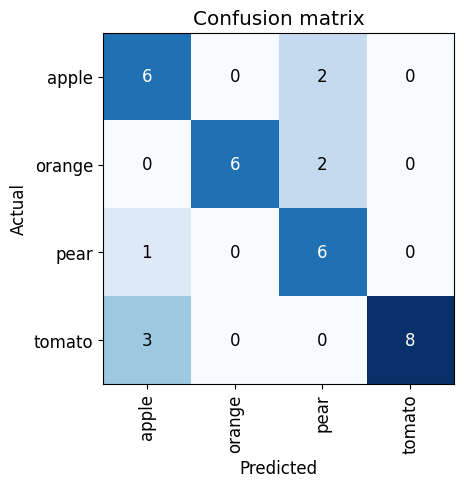

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
learn.export()
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [ ]:
learn_inf = load_learner(path/'export.pkl')
learn_inf.dls.vocab


['apple', 'orange', 'pear', 'tomato']

Saving Oranges.webp to Oranges.webp
Classifying image: Oranges.webp


Prediction: orange, Probability: 0.9876


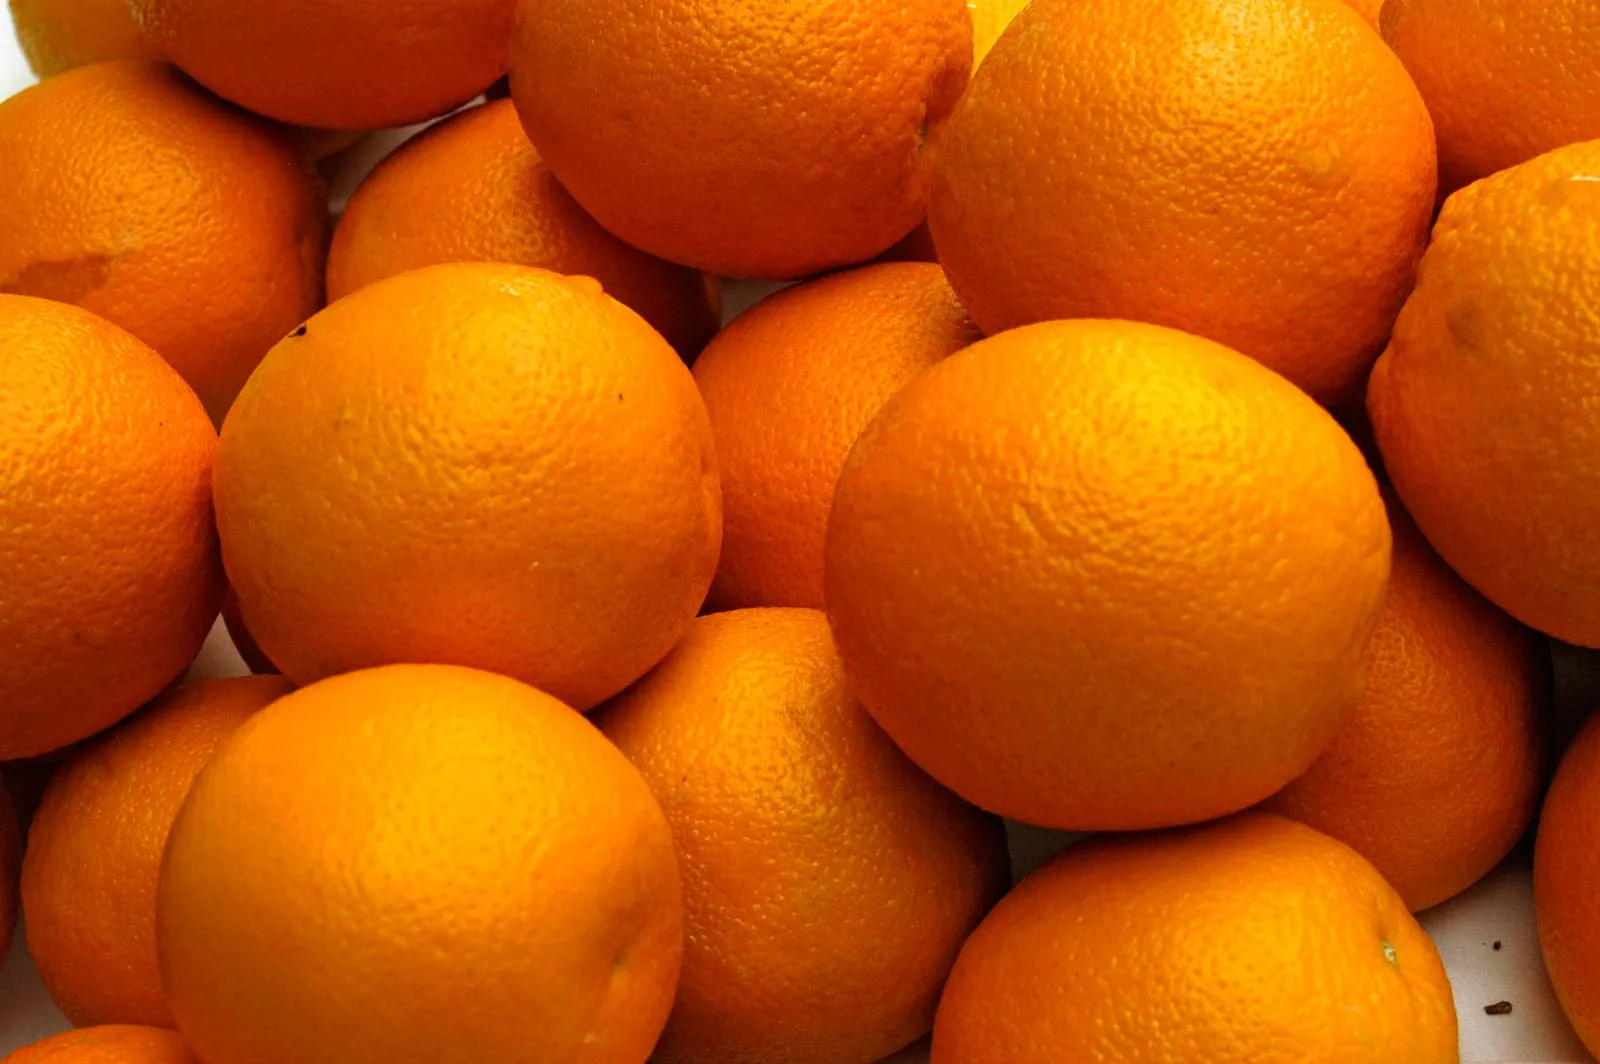

In [16]:
def classify_image(img_path):
    img = PILImage.create(img_path)
    pred, pred_idx, probs = learn_inf.predict(img)
    return pred, probs[pred_idx].item()

# Upload
uploaded = files.upload()

for file_name in uploaded.keys():
    print(f'Classifying image: {file_name}')
    pred, prob = classify_image(file_name)
    print(f'Prediction: {pred}, Probability: {prob:.4f}')

